<a href="https://colab.research.google.com/github/DhafinRA/Apriori/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [ ]:
#Raw Dataset
df = pd.read_csv('https://raw.githubusercontent.com/DhafinRA/Apriori/refs/heads/main/servis_bebek.csv')

# menampilkan 5 data teratas dari data frame
df.head()

,ServTransCode,ServTransDate,Items,NameOfServ,qty,profit
0,SRV001912080003,2019-12-08,Oli Mesin Matic,SERVICE INJEKSI MANUAL BEBEK/MATIC,1,0
1,SRV001912080003,2019-12-08,Grease Cvt,SERVICE INJEKSI MANUAL BEBEK/MATIC,1,0
2,SRV001912080003,2019-12-08,Handel Variasi,SERVICE INJEKSI MANUAL BEBEK/MATIC,1,0
3,SRV001912080003,2019-12-08,Air Radiator,SERVICE INJEKSI MANUAL BEBEK/MATIC,1,0
4,SRV001912120004,2019-12-12,Oli Gardan,SERVICE INJEKSI MANUAL BEBEK/MATIC,1,0


In [ ]:
# Menghilangkan spasi dalam data
df['Items'] = df['Items'].str.strip()

In [ ]:
#Mengeblompokkan transaksi berdasarkan kolom ServTransCode untuk kolom Items
transaksi = df.groupby('ServTransCode')['Items'].apply(list)

#Mengubah data menjadi bentuk one-hot encoding
te = TransactionEncoder()
tf_encode = te.fit(transaksi).transform(transaksi)
tf_df = pd.DataFrame(tf_encode, columns= te.columns_)

#print(tf_df.head())


   Air Radiator    Aki  As Shock  Ban Motor Matic   Baut  Bearing Cvt  \
0          True  False     False            False  False        False   
1         False  False     False            False  False        False   
2         False  False     False            False  False        False   
3         False  False     False            False  False        False   
4         False  False     False            False  False        False   

   Bohlam Depan  Bohlam Sen  Bohlam Stop   Busi  ...  Roller Beat  \
0         False       False        False  False  ...        False   
1         False       False        False  False  ...        False   
2         False       False        False   True  ...        False   
3         False       False        False  False  ...        False   
4         False       False        False  False  ...        False   

   Rumah Roller  Seal Pully Belakang  Seal Pully Depan  Seal Shock Bebek  \
0         False                False             False             Fal

In [ ]:
#frequent_implement = apriori(df,min_support=0.07,use_colnames=True)
frequent_itemsets = apriori(tf_df, min_support=0.07, use_colnames=True)

print(frequent_itemsets)

     support                                           itemsets
0   0.083333                                     (Air Radiator)
1   0.083333                                             (Baut)
2   0.083333                                             (Busi)
3   0.222222                                     (Filter Udara)
4   0.250000                                       (Grease Cvt)
5   0.111111                                          (Minuman)
6   0.444444                                       (Oli Gardan)
7   0.083333                            (Oli Mesin Bebek/Sport)
8   0.666667                                  (Oli Mesin Matic)
9   0.111111                                           (Roller)
10  0.083333                            (Oli Mesin Matic, Baut)
11  0.083333                         (Filter Udara, Grease Cvt)
12  0.083333                    (Filter Udara, Oli Mesin Matic)
13  0.138889                           (Grease Cvt, Oli Gardan)
14  0.222222                      (Greas

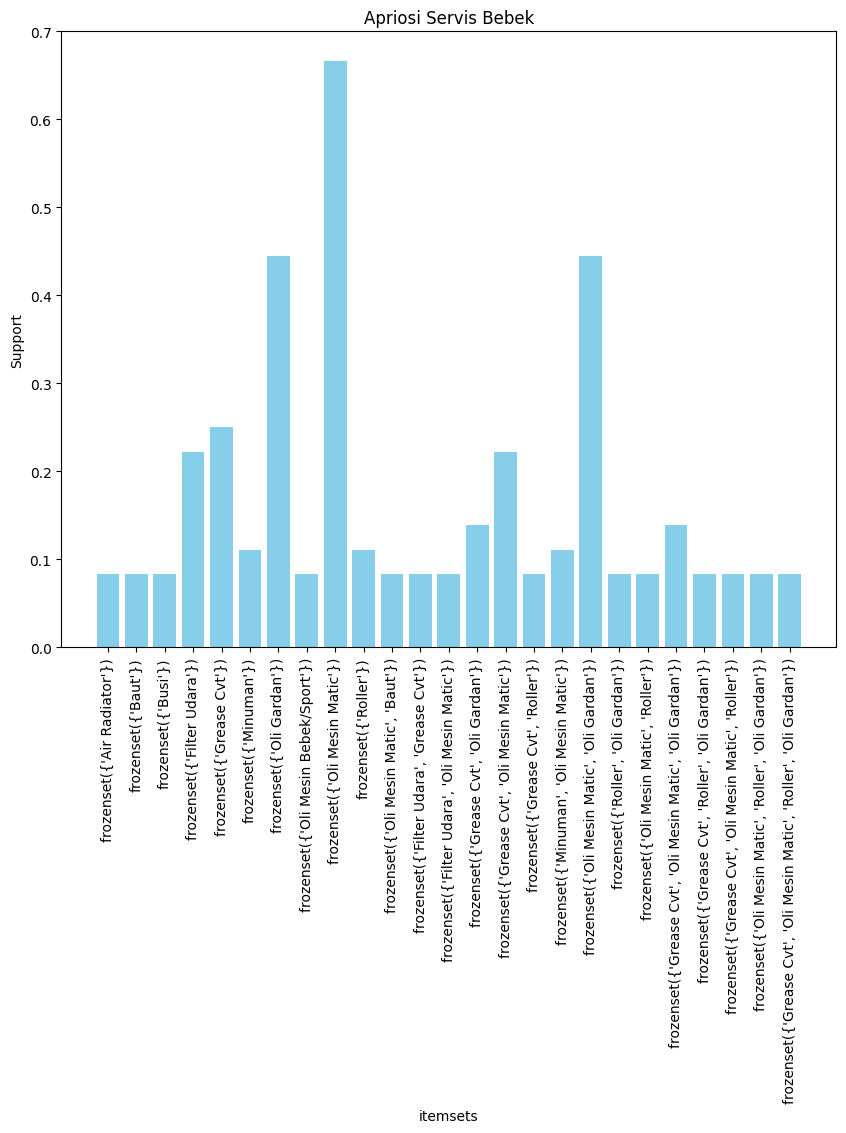

In [ ]:
#Visualisasi Bar chart
plt.figure(figsize=(10,8))
plt.bar(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'], color='skyblue')
plt.xlabel('itemsets')
plt.ylabel('Support')
plt.xticks(rotation=90)
plt.title('Apriosi Servis Bebek')
plt.show()